In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import data from the GitHub page
data = pd.read_csv('https://raw.githubusercontent.com'\
'/PacktWorkshops/The-Data-Analysis-Workshop'\
'/master/Chapter02/data/'\
'Absenteeism_at_work.csv', sep=";")

In [3]:
# Checking for column types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [4]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [5]:
print(f"dimensionality of the data: {data.shape}")
print(f"The Number of missing values: {data.isnull().sum().sum()}")

dimensionality of the data: (740, 21)
The Number of missing values: 0


In [6]:
# Some statistics on numerical values
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [7]:
# transforming the numerical values to their original categories
month_t = {1: "January", 2: "February", 3: "March", \
        4: "April", 5: "May", 6: "June", 7: "July", \
        8: "August", 9: "September", 10: "October", \
        11: "November", 12: "December", 0: "Unknown"}
day_t = {2: "Monday", 3: "Tuesday", 4: "Wednesday", \
         5: "Thursday", 6: "Friday"}
season_t = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
education_t= {1: "high_school", 2: "graduate", \
                      3: "postgraduate", 4: "master_phd"}
yes_no_t = {0: "No", 1: "Yes"}

In [8]:
#back transform numerical values to categorical values
pp_data = data.copy()

pp_data['Month of absence'] = pp_data['Month of absence'].apply(lambda x: month_t[x])
pp_data['Day of the week'] = pp_data['Day of the week'].apply(lambda x: day_t[x])
pp_data['Seasons'] = pp_data['Seasons'].apply(lambda x: season_t[x])
pp_data['Education'] = pp_data['Education'].apply(lambda x: education_t[x])
pp_data['Disciplinary failure'] = pp_data['Disciplinary failure'].apply(lambda x: yes_no_t[x])
pp_data['Social drinker'] = pp_data['Social drinker'].apply(lambda x: yes_no_t[x])
pp_data['Social smoker'] = pp_data['Social smoker'].apply(lambda x: yes_no_t[x])
pp_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,July,Tuesday,Spring,289,36,13,33,239.554,...,No,high_school,2,Yes,No,1,90,172,30,4
1,36,0,July,Tuesday,Spring,118,13,18,50,239.554,...,Yes,high_school,1,Yes,No,0,98,178,31,0
2,3,23,July,Wednesday,Spring,179,51,18,38,239.554,...,No,high_school,0,Yes,No,0,89,170,31,2
3,7,7,July,Thursday,Spring,279,5,14,39,239.554,...,No,high_school,2,Yes,Yes,0,68,168,24,4
4,11,23,July,Thursday,Spring,289,36,13,33,239.554,...,No,high_school,2,Yes,No,1,90,172,30,2


Note that in the Month of absence column, a '0' value is present, which is encoded as "Unknown" as
no month corresponds to 0.

#### Based on the description of the data, the Reason for absence column contains information about the absence, which is encoded based on the International Code of Diseases (ICD).
#### values 1 to 21 represent ICD encoding(which are diseases) but values 22 to 28 are separate reasons, which do not represent a disease, while value 0 is not defined, hence the encoded reason "Unknown". 
### As all values contained in the ICD represent some type of disease, it makes sense to create a new binary variable that indicates whether the current reason for absence is related to some sort of disease or not.

In [9]:
"""
define function, which checks if the provided integer value
is contained in the ICD or not
"""
def in_icd(val):
    return "Yes" if val>=1 and val<=21 else "No"

In [10]:
# Adding a disease column to our data
pp_data["disease"] = pp_data["Reason for absence"].apply(in_icd)

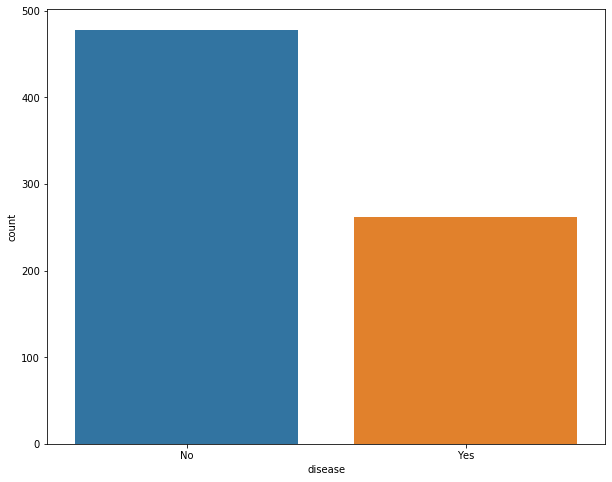

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(data=pp_data,x="disease")

### This barplot shows that number of absence employees for seaprate reasons is more (it almost twice) than the number of absence reasons of ICD diseases.

Text(0, 0.5, 'Number of entries per reason of absence')

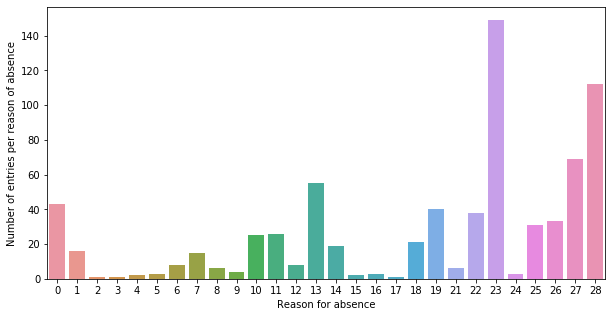

In [12]:
# Get number of entries for each reason for absence
plt.figure(figsize=(10,5))
ax = sns.countplot(data=pp_data,x="Reason for absence")
ax.set_ylabel("Number of entries per reason of absence")

### we can say that the most frequent reasons for absence are related to medical consultations (23), dental consultations (28), and physiotherapy (27). 
### On the other hand, the most frequent reasons for absence encoded in the ICD encoding are related to diseases of the musculoskeletal system and connective tissue (13) and injury, poisoning, and certain other consequences of external causes (19).

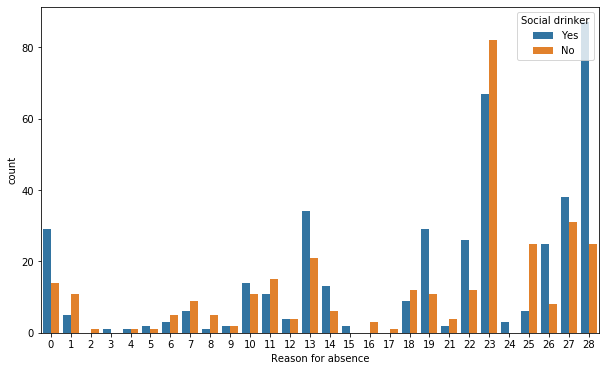

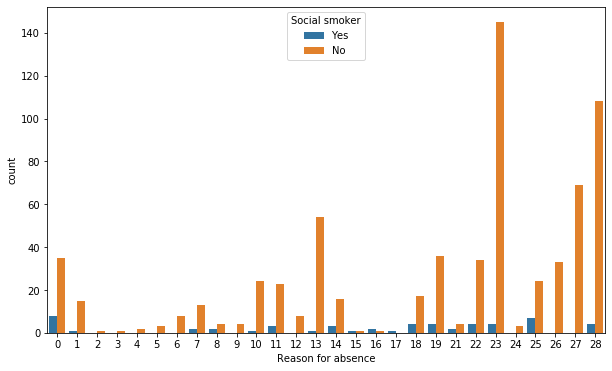

In [13]:
# plot reasons for absence against being a social drinker/smoker
plt.figure(figsize=(10,6))
sns.countplot(data=pp_data,x="Reason for absence",hue="Social drinker",hue_order=["Yes","No"])
plt.figure(figsize=(10,6))
sns.countplot(data=pp_data,x="Reason for absence",hue="Social smoker",hue_order=["Yes","No"])

In [14]:
# Calculating the actual count for social drinkers and smokers from the pp_data
print(pp_data["Social drinker"].value_counts(normalize=True))
print(pp_data["Social smoker"].value_counts(normalize=True))

Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64
No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64


## Identifying Reasons of Absence with Higher Probability Among Drinkers and Smokers

### We will use conditional probability to show that the probabilities of being absence (for each reason) given that the employee is a drinker\smoker.

In [15]:
# calculating the probability of being drinker\smoker
prob_sd = pp_data["Social drinker"].value_counts()[0] / pp_data.shape[0]
prob_sm = pp_data["Social smoker"].value_counts()[1] / pp_data.shape[0]
print(f"P(social drinker) = {prob_sd:.3f} \
| P(social smoker) = {prob_sm:.3f}")

P(social drinker) = 0.568 | P(social smoker) = 0.073


In [16]:
# Creating masks in our data which only account for entries where employee are drinkers or smokers
drinker_mask = pp_data["Social drinker"] == "Yes"
smoker_mask = pp_data["Social smoker"] == "Yes"

In [17]:
# Calculating the probability of being absence (for each reason) and being drinker\smoker too
total_entries = pp_data.shape[0]
absence_d_prob = pp_data["Reason for absence"][drinker_mask].value_counts()/total_entries
absence_s_prob = pp_data["Reason for absence"][smoker_mask].value_counts()/total_entries

In [18]:
# compute conditional probabilities
cond_prob_as = pd.DataFrame(index=range(0,29))
cond_prob_as["P(Absence | social drinker)"] = absence_d_prob / prob_sd
cond_prob_as["P(Absence | social smoker)"] = absence_s_prob / prob_sm

Text(0, 0.5, 'Conditional probability')

<Figure size 432x288 with 0 Axes>

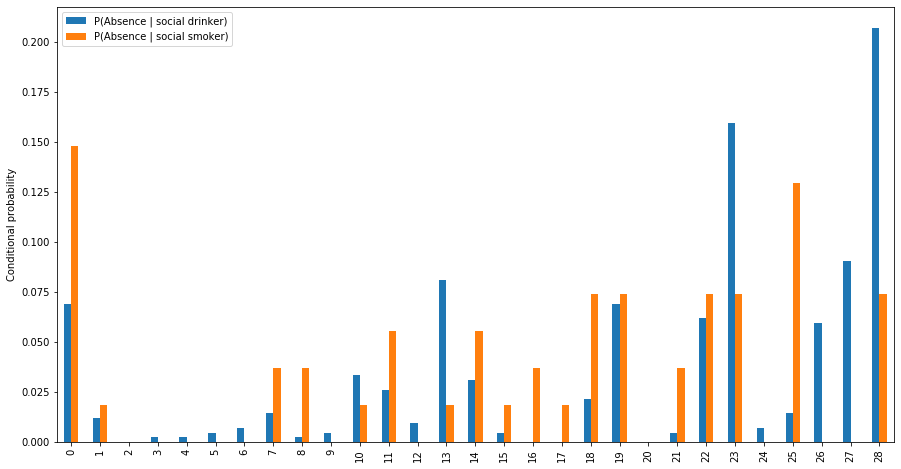

In [19]:
# Ploting our final results
plt.figure()
ax = cond_prob_as.plot.bar(figsize=(15,8))
ax.set_ylabel("Conditional probability")

### We can observe from the previous plot, the highest reason for absence for drinkers is dental consultations (28), followed by medical consultations (23).
### Smokers' absences, however, are mostly due to unknown reasons (0) and laboratory examinations (25).

## Identifying the Probability of Being a Drinker/Smoker, Conditioned to Absence Reason Using Bayes theorem.

In [20]:
# Calculating the probability of being Absence for each reason
prob_abs = pp_data["Reason for absence"].value_counts(normalize=True)

# Calculating the conditional probabilities
cond_prob_sa = pd.DataFrame(index=range(0,29))
cond_prob_sa["P(social drinker | Absence)"] = (cond_prob_as["P(Absence | social drinker)"] * prob_sd) / prob_abs
cond_prob_sa["P(social smoker | Absence)"] = (cond_prob_as["P(Absence | social smoker)"] * prob_sm) / prob_abs

Text(0, 0.5, 'Conditional probability')

<Figure size 432x288 with 0 Axes>

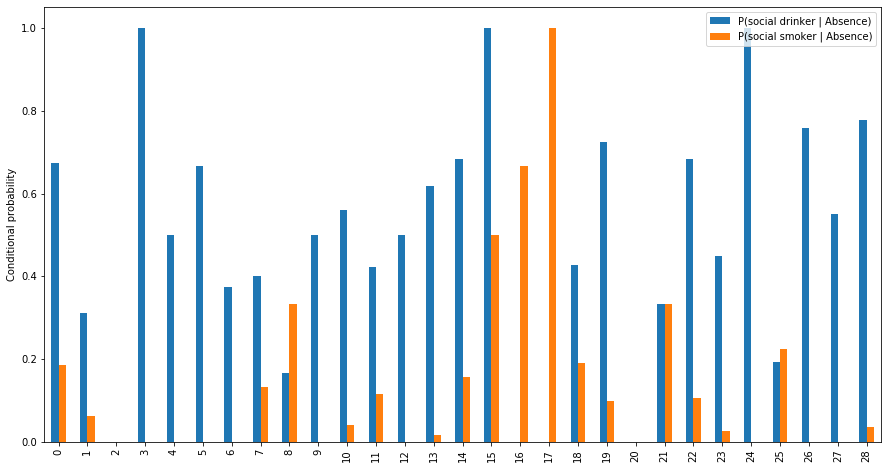

In [21]:
# Ploting the results
plt.figure()
ax = cond_prob_sa.plot.bar(figsize=(15,8))
ax.set_ylabel("Conditional probability")

### The conditional probabilites of being social drinker/smoker given each reason occurs are quite high
#### This is due to the fact that the number of entries is very small; as such, if all the registered employees who were absent for a certain reason are smokers, the probability of being a smoker, once that reason has been registered, will be equal to one (based on the available data).

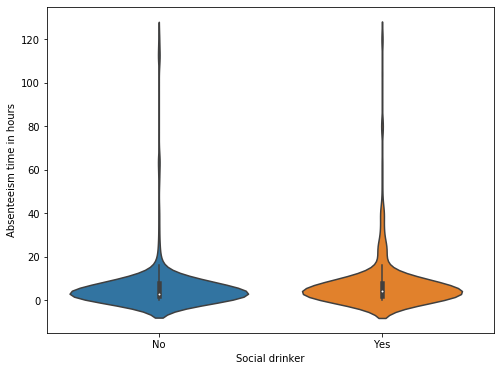

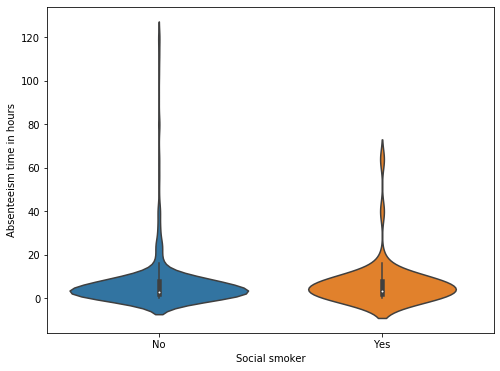

In [22]:
# create violin plots of the absenteeism time in hours
plt.figure(figsize=(8,6))
sns.violinplot(x="Social drinker", y="Absenteeism time in hours", \
data=pp_data, order=["No", "Yes"])
plt.figure(figsize=(8,6))

sns.violinplot(x="Social smoker", y="Absenteeism time in hours", \
data=pp_data, order=["No", "Yes"])

### Despite some differences in the outliers between smokers and non-smokers, there is no substantial difference in the distribution of absenteeism hours in drinkers and smokers.

## Performing a Hypothesis test to test wither the average of absenteeism time in hours is the same for dinrkers and non drinkers

#### H0: The average of absenteeism is the same 
#### H1: The average of absenteeism is different

In [23]:
from scipy.stats import ttest_ind
hours_col = "Absenteeism time in hours"
# test mean absenteeism time for drinkers
drinkers_mask = pp_data["Social drinker"] == "Yes"
hours_drinkers = pp_data.loc[drinker_mask, hours_col]
hours_non_drinkers = pp_data\
.loc[~drinker_mask, hours_col]
drinkers_test = ttest_ind(hours_drinkers, hours_non_drinkers)
print(f"Statistic value: {drinkers_test[0]}, \
p-value: {drinkers_test[1]}")

Statistic value: 1.7713833295243993, p-value: 0.07690961828294651


#### the same test for smokers and non-smokers

In [24]:
# test mean absenteeism time for smokers
smokers_mask = pp_data["Social smoker"] == "Yes"
hours_smokers = pp_data.loc[smokers_mask, hours_col]
hours_non_smokers = pp_data.loc[~smokers_mask, hours_col]
smokers_test = ttest_ind(hours_smokers, hours_non_smokers)
print(f"Statistic value: {smokers_test[0]}, \
p-value: {smokers_test[1]}")

Statistic value: -0.24277795417700243, p-value: 0.8082448720154971


### The p-value of the both test is larger than the critical value 0.05 so that we can not reject the null hypothesis and the average of absenteeism time is the same for both.

### Perform a Kolmogorov-Smirnov test to assess the difference in the distributions.

In [25]:
# perform Kolmogorov-Smirnov test for comparing the distributions
from scipy.stats import ks_2samp
ks_drinkers = ks_2samp(hours_drinkers, hours_non_drinkers)
ks_smokers = ks_2samp(hours_smokers, hours_non_smokers)
print(f"Drinkers comparison: statistics={ks_drinkers[0]:.3f}, \
pvalue={ks_drinkers[1]:.3f}")
print(f"Smokers comparison: statistics={ks_smokers[0]:.3f}, \
pvalue={ks_smokers[1]:.3f}")

Drinkers comparison: statistics=0.135, pvalue=0.002
Smokers comparison: statistics=0.104, pvalue=0.607


#### The p-value for the drinkers dataset is lower than the critical 0.05, which is strong evidence against the null hypothesis of the two distributions being equal. 
#### On the other hand, as the p-value for the smokers dataset is higher than 0.05, you cannot reject the null hypothesis.

### Checking the body mass of employees into four categories.

In [26]:
"""
function for computing the BMI category based on BMI value
"""
def get_bmi_category(bmi):
    if bmi < 18.5:
        category = "underweight"
    elif bmi >= 18.5 and bmi < 25:
        category = "healthy weight"
    elif bmi >= 25 and bmi < 30:
        category = "overweight"
    else:
        category = "obese"
    return category
# compute BMI category
pp_data["BMI category"] = pp_data["Body mass index"].apply(get_bmi_category)

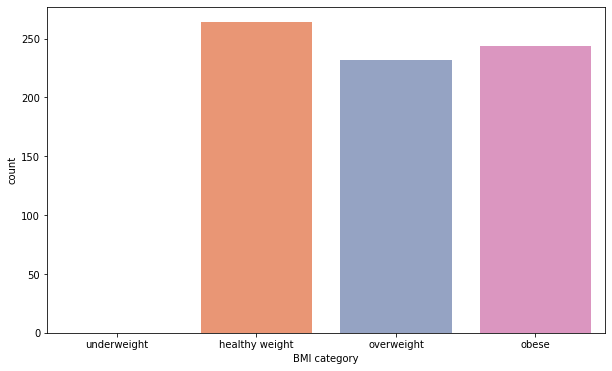

In [27]:
# plot number of entries for each category
plt.figure(figsize=(10, 6))
sns.countplot(data=pp_data, x='BMI category', order=["underweight", "healthy weight", \
"overweight", "obese"], palette="Set2")

#### From the above plot we can see that more than 60% of employees are overweight or obese.

Text(0.5, 0, 'Number of employees')

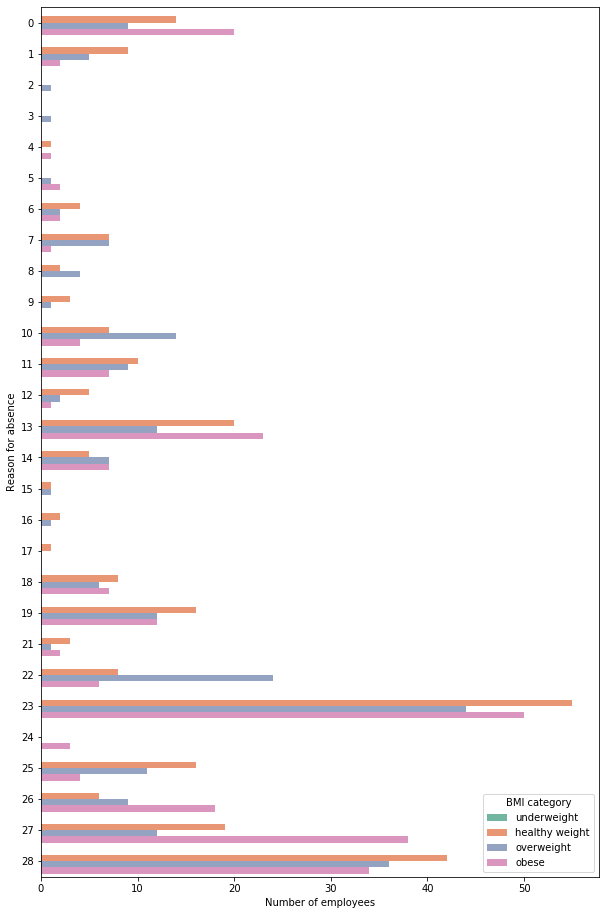

In [28]:
# plot BMI categories vs Reason for absence

plt.figure(figsize=(10, 16))
ax = sns.countplot(data=pp_data, \
y="Reason for absence", hue="BMI category", \
hue_order=["underweight", "healthy weight", \
"overweight", "obese"], \
palette="Set2")
ax.set_xlabel("Number of employees")

### From the above plot we can say that each reason almost the same number of each bmi category of employees.

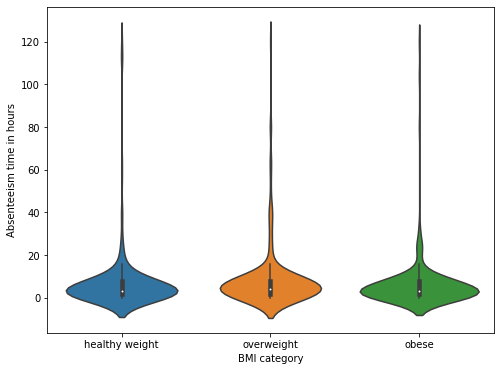

In [29]:
# plot distribution of absence time, based on BMI category

plt.figure(figsize=(8,6))
sns.violinplot(x="BMI category", \
y="Absenteeism time in hours", \
data=pp_data, \
order=["healthy weight", "overweight", "obese"])

### For the distributions plot again the same conclusion there is no effect of the body mass of employees on the absenteeism.

## Age and Education Factors

Text(0.5, 1.0, 'Correlation=0.066 | p-value=0.074')

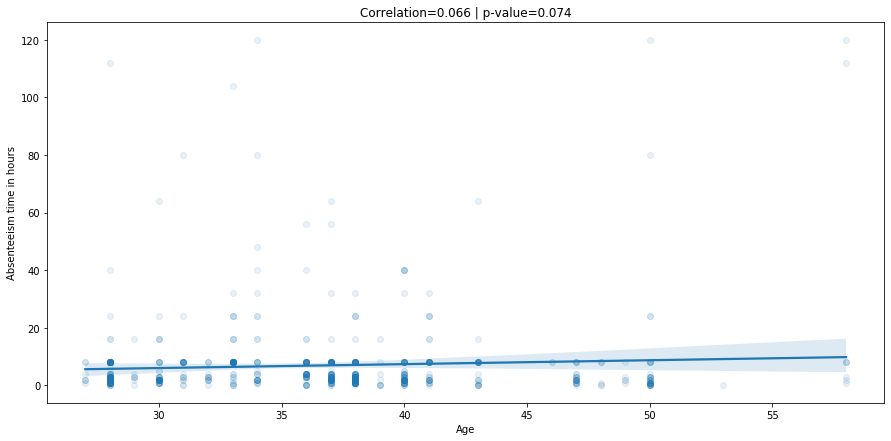

In [30]:
from scipy.stats import pearsonr
# compute Pearson's correlation coefficient and p-value

pearson_test = pearsonr(pp_data["Age"],pp_data["Absenteeism time in hours"])

# create regression plot and add correlation coefficient in the title

plt.figure(figsize=(15,7))
ax = sns.regplot(x="Age", y="Absenteeism time in hours", data=pp_data,scatter_kws={"alpha":0.1})
ax.set_title(f"Correlation={pearson_test[0]:.03f} | p-value={pearson_test[1]:.03f}")

### We can observe that the resulting plot shows no significant pattern. Furthermore, the correlation coefficient is extremely small (0.066), and its p-value is larger than 0.05. 
### This provides strong evidence that there is no relationship between age and absenteeism time in hours.

## Investigating the Impact of Age on Reason for Absence

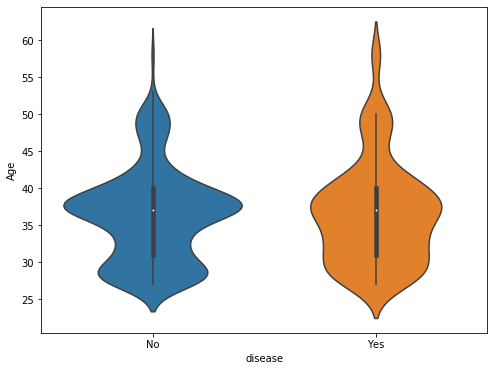

In [31]:
# Creating violin plot between Age and Disease 
plt.figure(figsize=(8,6))
sns.violinplot(x="disease", y="Age",data=pp_data)

In [32]:

# get Age entries for employees with Disease == Yes and Disease == No

disease_mask = pp_data["disease"] == "Yes"
disease_ages = pp_data["Age"][disease_mask]
no_disease_ages = pp_data["Age"][~disease_mask]

# perform hypothesis test for equality of means

test_res = ttest_ind(disease_ages, no_disease_ages)
print(f"Test for equality of means: \
statistic={test_res[0]:0.3f}, pvalue={test_res[1]:0.3f}")

# test equality of distributions via Kolmogorov-Smirnov test

ks_res = ks_2samp(disease_ages, no_disease_ages)
print(f"KS test for equality of distributions: \
statistic={ks_res[0]:0.3f}, pvalue={ks_res[1]:0.3f}")

Test for equality of means: statistic=0.630, pvalue=0.529
KS test for equality of distributions: statistic=0.057, pvalue=0.619


###  from the above plot we can see differences between the two distributions of age, so we can observe that slightly more samples are present for older employees.
### From the results of the two tests, we can conclude that there is no statistically significant difference between the two distributions. Thus, age is neither an indicator for the length of an absence nor for its type.

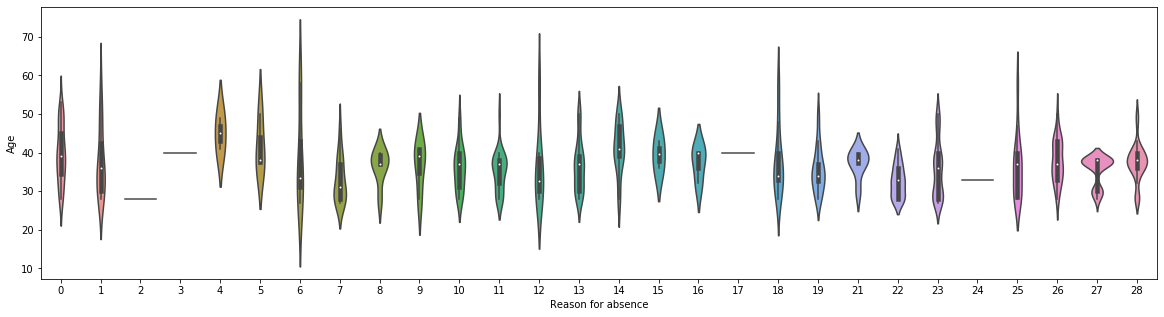

In [33]:
# violin plot of reason for absence vs age
plt.figure(figsize=(20,5))
sns.violinplot(x="Reason for absence", y="Age", data=pp_data)

### In light of the previously performed analysis, we can conclude that Age has no impact on the employees' absenteeism.

## Investigating the Impact of Education on Reason for Absence

In [34]:
# compute percentage of employees per education level

education_types = ["high_school", "graduate", "postgraduate", "master_phd"]
counts = pp_data["Education"].value_counts()
percentages = pp_data["Education"].value_counts(normalize=True)
for educ_type in education_types:
    print(f"Education type: {educ_type:12s} \
    | Counts : {counts[educ_type]:6.0f} \
    | Percentage: {100*percentages[educ_type]:4.1f}")

Education type: high_school      | Counts :    611     | Percentage: 82.6
Education type: graduate         | Counts :     46     | Percentage:  6.2
Education type: postgraduate     | Counts :     79     | Percentage: 10.7
Education type: master_phd       | Counts :      4     | Percentage:  0.5


#### Most of Employees have a high school dgree which biased our data towards them.

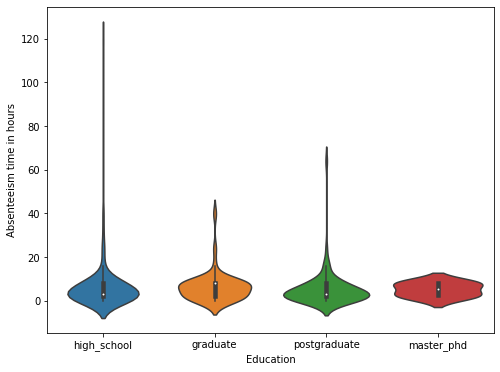

In [35]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Education", y="Absenteeism time in hours", data=pp_data, order=education_types)

#### Lower education degrees have most of the extreme cases of absence.

In [36]:
# compute mean and standard deviation of absence hours

for educ_type in education_types:
    mask = pp_data["Education"] == educ_type
    hours = pp_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Education type: {educ_type:12s} | Mean : {mean:.03f} \
    | Stddev: {stddev:.03f}")

Education type: high_school  | Mean : 7.190     | Stddev: 14.259
Education type: graduate     | Mean : 6.391     | Stddev: 6.754
Education type: postgraduate | Mean : 5.266     | Stddev: 7.963
Education type: master_phd   | Mean : 5.250     | Stddev: 3.202


#### The mean and standard deviation of the hours of absence are decreasing, meaning that highly educated employees tend to have shorter absences.
#### Higher degree of education is not a cause for such a phenomenon and is more of an indication of it.

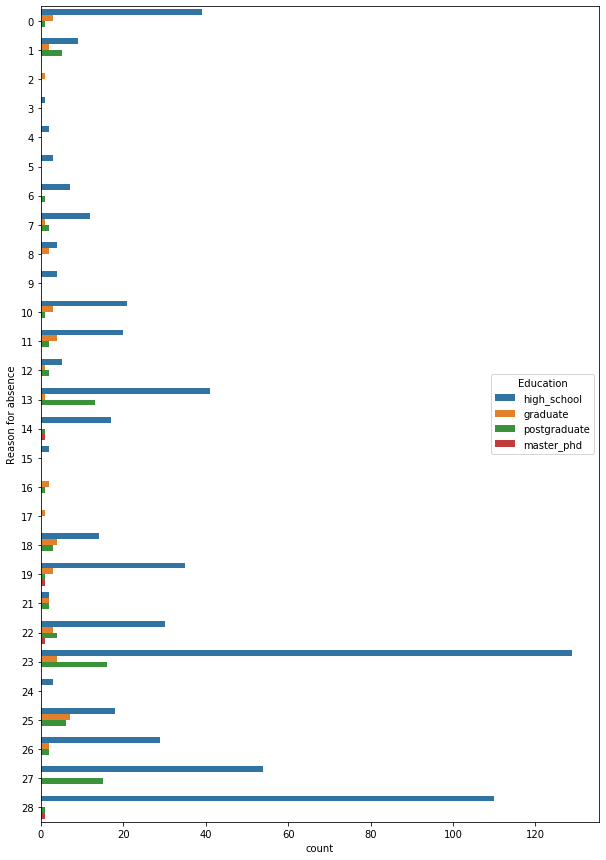

In [37]:
# plot reason for absence, based on education level

plt.figure(figsize=(10,15))
sns.countplot(data=pp_data,y="Reason for absence", hue="Education", hue_order=education_types)

### Most of the absences relate to employees with a high_school level of education. 
### This is due to the high bias in our data, as most of the employees only have a high school degree.

## Computing the probability of being absent for more than one working week (40 hours) is greater for employees with a high school degree compared to graduates.

In [38]:
"""
define threshold for extreme hours of absenteeism and get total number
of entries
"""
threshold = 40
total_entries = len(pp_data)

# find entries with Education == high_school

high_school_mask = pp_data["Education"] == "high_school"

# find entries with absenteeism time in hours more than threshold

extreme_mask = pp_data["Absenteeism time in hours"] > threshold

# compute probability of having high school degree

prob_high_school = len(pp_data[high_school_mask])/total_entries

# compute probability of having more than high school degree

prob_graduate = len(pp_data[~high_school_mask])/total_entries

"""
compute probability of having high school and being absent for more
than "threshold" hours
"""

prob_extreme_high_school = len(pp_data\
[high_school_mask & extreme_mask])/total_entries

"""
compute probability of having more than high school and being absent
for more than "threshold" hours
"""

prob_extreme_graduate = len(pp_data[~high_school_mask & extreme_mask])/total_entries

# compute and print conditional probabilities

cond_prob_extreme_high_school = prob_extreme_high_school/prob_high_school
cond_prob_extreme_graduate = prob_extreme_graduate/prob_graduate
print(f"P(extreme absence | degree = high_school) = \
{100*cond_prob_extreme_high_school:3.2f}")
print(f"P(extreme absence | degree != high_school) = \
{100*cond_prob_extreme_graduate:3.2f}")
pp_data.head().T

P(extreme absence | degree = high_school) = 2.29
P(extreme absence | degree != high_school) = 0.78


,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


### From these computations, we see that the probability of employees with a high school degree having an absence of more than 40 hours is 2.29%, which is approximately three times greater than the corresponding probability for employees with a university degree (0.78%).

## Transportation Costs and Distance to Work Factors

<Figure size 720x432 with 0 Axes>

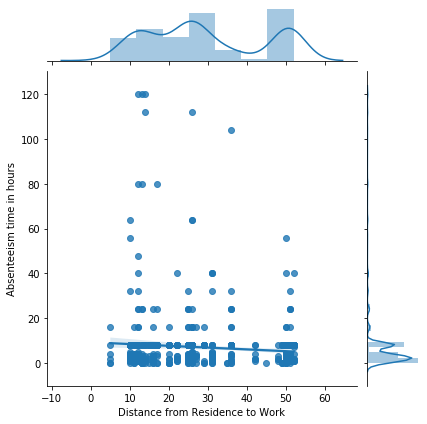

<Figure size 720x432 with 0 Axes>

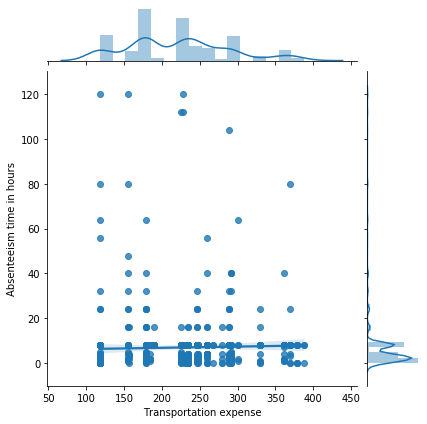

In [39]:
# plot transportation costs and distance to work against hours

plt.figure(figsize=(10,6))
sns.jointplot(x="Distance from Residence to Work", y="Absenteeism time in hours", data=pp_data, kind="reg")

plt.figure(figsize=(10,6))
sns.jointplot(x="Transportation expense", y="Absenteeism time in hours", data=pp_data, kind="reg")

#### As we can see, the distributions of Distance from Residence to Work and Transportation expense look close to normal distributions, while the absenteeism time in hours is heavily right-skewed. This makes the comparison between the variables difficult to interpret.

### Transforming The Absenteeism time in hours into normal distribution using Yeo-Johnson transformation.

<Figure size 720x432 with 0 Axes>

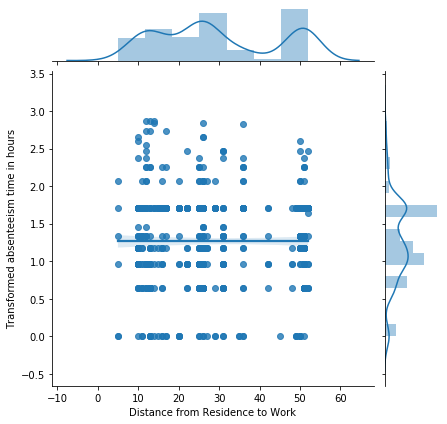

<Figure size 720x432 with 0 Axes>

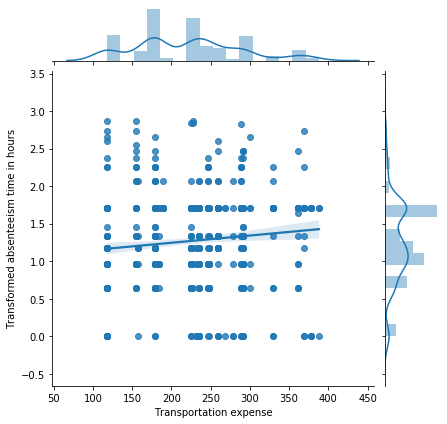

In [40]:
# run Yeo-Johnson transformation and recreate previous plots
from scipy.stats import yeojohnson

hours = yeojohnson(pp_data["Absenteeism time in hours"].apply(float))
distances = pp_data["Distance from Residence to Work"]
expenses = pp_data["Transportation expense"]

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind="reg")
ax.set_axis_labels("Distance from Residence to Work","Transformed absenteeism time in hours")

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind="reg")
ax.set_axis_labels("Transportation expense", "Transformed absenteeism time in hours")


#### We can also see that the regression line between the variables is almost flat for the Distance from Residence to Work column (which is a clear indicator of zero correlation) but has a slight upward slope for the Transportation Expense column. 
#### Therefore, we can expect a small positive correlation.

<Figure size 720x432 with 0 Axes>

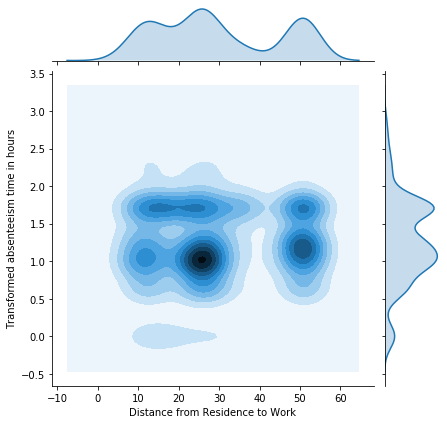

<Figure size 720x432 with 0 Axes>

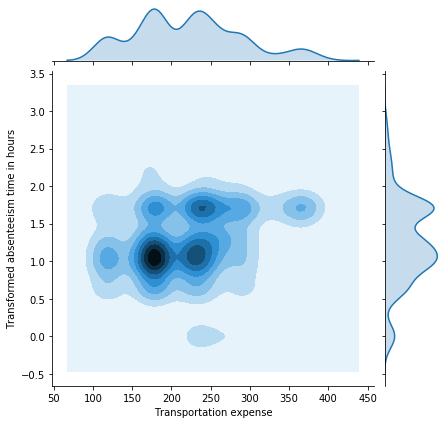

In [41]:
# run Yeo-Johnson transformation and recreate previous plots
from scipy.stats import yeojohnson

hours = yeojohnson(pp_data["Absenteeism time in hours"].apply(float))
distances = pp_data["Distance from Residence to Work"]
expenses = pp_data["Transportation expense"]

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind="kde")
ax.set_axis_labels("Distance from Residence to Work","Transformed absenteeism time in hours")

plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind="kde")
ax.set_axis_labels("Transportation expense", "Transformed absenteeism time in hours")

In [42]:
# investigate correlation between the columns
distance_corr = pearsonr(hours[0], distances)
expenses_corr = pearsonr(hours[0], expenses)
print(f"Distances correlation: corr={distance_corr[0]:.3f}, \
pvalue={distance_corr[1]:.3f}")
print(f"Expenses comparison: corr={expenses_corr[0]:.3f}, \
pvalue={expenses_corr[1]:.3f}")

Distances correlation: corr=-0.000, pvalue=0.999
Expenses comparison: corr=0.113, pvalue=0.002


### These results confirm our observation, stating that there is a slight positive correlation between Transportation expense and Absenteeism time in hours.

## Analyzing the impact of the Day of the week and Month of absence columns, and their impact on the employees' absenteeism.

Text(0.5, 1.0, 'Number of absences per Month')

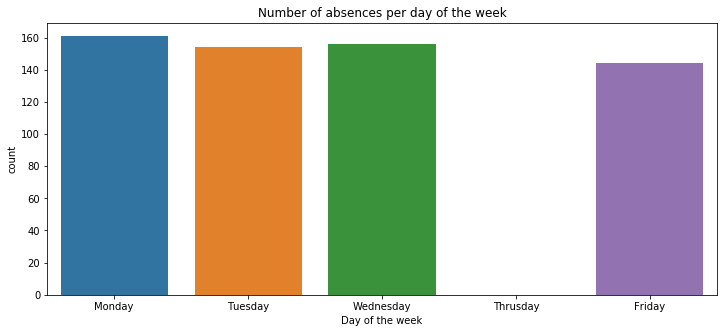

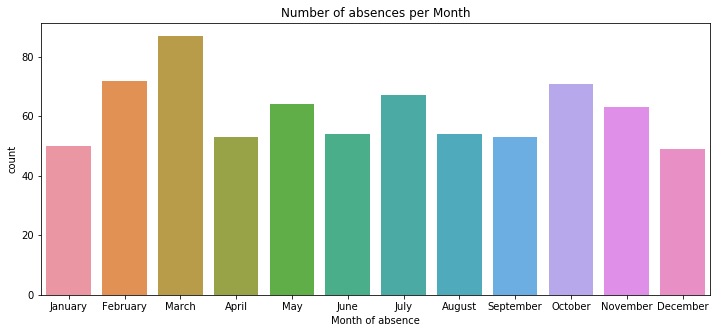

In [63]:
# count entries per day of the week and month
plt.figure(figsize=(12,5))
ax = sns.countplot(data=pp_data, x="Day of the week", order=['Monday','Tuesday','Wednesday','Thrusday','Friday'])
ax.set_title("Number of absences per day of the week")

plt.figure(figsize=(12,5))
ax = sns.countplot(data=pp_data, x="Month of absence", order=["January", "February", "March", \
                                                              "April", "May", "June", "July", \
                                                              "August", "September", "October",\
                                                              "November", "December"])
ax.set_title("Number of absences per Month")

#### In the previous plots, we can not see any differences. All we could say is that March has most of the absence days, but it's hard to say that the difference is significant. It seems fewer absences occur on Thursdays.

## Investigating Absence Hours, Based on the Day of the Week and the Month of the Year

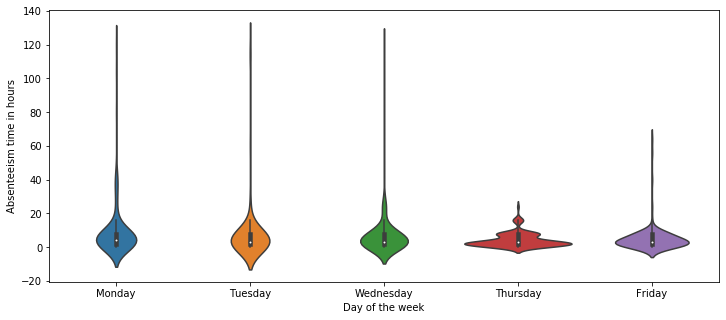

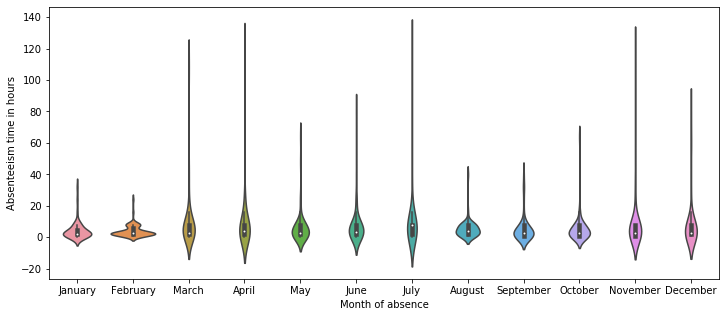

In [64]:
# analyze average distribution of absence hours
plt.figure(figsize=(12,5))
sns.violinplot(x="Day of the week", y="Absenteeism time in hours", data=pp_data, order=["Monday", "Tuesday", \
                                                                                        "Wednesday", "Thursday", "Friday"])
plt.figure(figsize=(12,5))
sns.violinplot(x="Month of absence", y="Absenteeism time in hours", data=pp_data,
              order=["January", "February", \
"March", "April", "May", "June", "July",\
"August", "September", "October", \
"November", "December"])


In [45]:
"""
Compute mean and standard deviation of absence hours per day of the
week
"""
dow = ["Monday","Tuesday", "Wednesday","Thursday", "Friday"]
for edow in dow:
    mask = pp_data["Day of the week"] == edow
    hours = pp_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Day of the week: {edow:10s} | Mean: {mean:.03f} | Stddev: {stddev:0.3f}" )

Day of the week: Monday     | Mean: 9.248 | Stddev: 15.973
Day of the week: Tuesday    | Mean: 7.981 | Stddev: 18.027
Day of the week: Wednesday  | Mean: 7.147 | Stddev: 13.268
Day of the week: Thursday   | Mean: 4.424 | Stddev: 4.266
Day of the week: Friday     | Mean: 5.125 | Stddev: 7.911


In [46]:
"""
Compute mean and standard deviation of absence hours per day of the
month
"""
months = ["January", "February", "March", "April", "May", \
"June", "July", "August", "September", "October", \
"November", "December"]
for month in months:
    mask = pp_data["Month of absence"] == month
    hours = pp_data["Absenteeism time in hours"][mask]
    mean = hours.mean()
    stddev = hours.std()
    print(f"Month: {month:10s} | Mean : {mean:8.03f} \
| Stddev: {stddev:8.03f}")

Month: January    | Mean :    4.440 | Stddev:    5.786
Month: February   | Mean :    4.083 | Stddev:    3.710
Month: March      | Mean :    8.793 | Stddev:   16.893
Month: April      | Mean :    9.094 | Stddev:   18.024
Month: May        | Mean :    6.250 | Stddev:   10.314
Month: June       | Mean :    7.611 | Stddev:   12.359
Month: July       | Mean :   10.955 | Stddev:   21.547
Month: August     | Mean :    5.333 | Stddev:    5.749
Month: September  | Mean :    5.509 | Stddev:    8.407
Month: October    | Mean :    4.915 | Stddev:    8.055
Month: November   | Mean :    7.508 | Stddev:   16.121
Month: December   | Mean :    8.449 | Stddev:   16.049


#### We observe that the average duration of the absences is slightly shorter on Thursday (4.424 hours), while absences during July have the longest average duration (10.955 hours).

### To determine whether these values are statistically significant we will perform statistical test for average duration difference.

In [47]:
thursday_mask = pp_data["Day of the week"] == "Thursday"
july_mask = pp_data["Month of absence"] == "July"

thursday_data = pp_data["Absenteeism time in hours"][thursday_mask]
no_thurs_data = pp_data["Absenteeism time in hours"][~thursday_mask]
july_data = pp_data["Absenteeism time in hours"][july_mask]
no_jul_data = pp_data["Absenteeism time in hours"][~july_mask]

# Test ttest

thursday_res = ttest_ind(thursday_data, no_thurs_data)
july_res = ttest_ind(july_data, no_jul_data)

print(f"Thursday test result: statistic={thursday_res[0]:.3f}, \
pvalue={thursday_res[1]:.3f}")
print(f"July test result: statistic={july_res[0]:.3f}, \
pvalue={july_res[1]:.3f}")

Thursday test result: statistic=-2.307, pvalue=0.021
July test result: statistic=2.605, pvalue=0.009


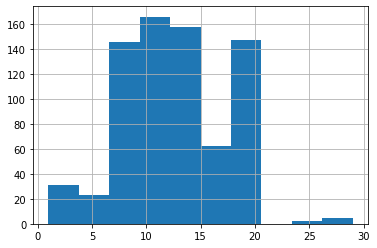

In [48]:
pp_data["Service time"].hist()

In [49]:
pp_data.head().T


,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


# Conculusion

### Since the p-values from both the statistical tests are below the critical value of 0.05, we can conclude the following:
#### • There is a statistically significant difference between Thursdays and other days of the week. Absences on Thursday have a shorter duration, on average.
#### • Absences during July are the longest over the year. Also, in this case, we can reject the null hypothesis of having no difference.
### From the analysis we've performed in this exercise, we can conclude that our initial observations about the difference in absenteeism during the month of July and on Thursdays are correct, we cannot claim that this is the cause, but only state that certain trends exist in the data.

## Analyzing the Service Time and Son Columns

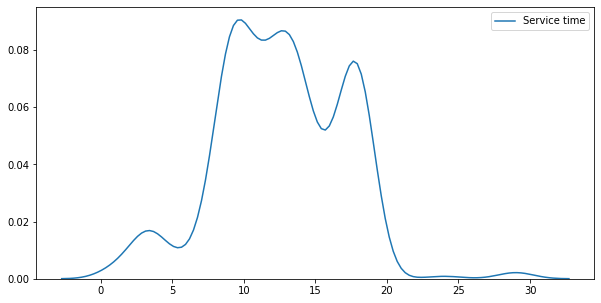

In [50]:
# Analyzing the distribution of the Service time

plt.figure(figsize=(10,5))
sns.kdeplot(pp_data['Service time'])


In [51]:
import scipy
ks_res = scipy.stats.kstest(pp_data["Service time"],"norm")
print(f"KS test for normality distribution: \
statistic={ks_res[0]:0.3f}, pvalue={ks_res[1]:0.3f}")

KS test for normality distribution: statistic=0.989, pvalue=0.000


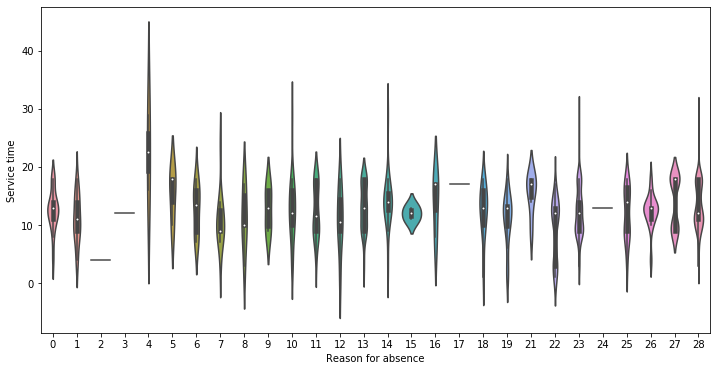

In [52]:
plt.figure(figsize=(12,6))
sns.violinplot(x="Reason for absence", y="Service time", data=pp_data)

<Figure size 720x432 with 0 Axes>

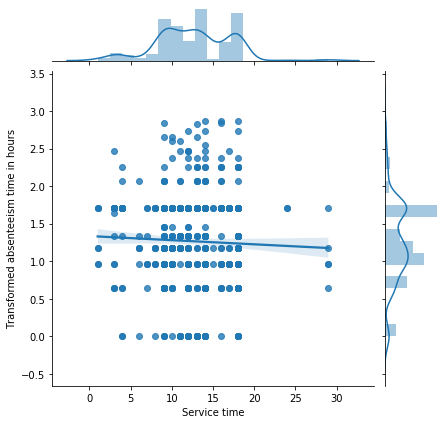

In [53]:
absenteeism_time = yeojohnson(data["Absenteeism time in hours"]\
.apply(float))[0]
service_time = data["Service time"]
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=service_time, y=absenteeism_time,data=pp_data, kind="reg")
ax.set_axis_labels("Service time","Transformed absenteeism time in hours")

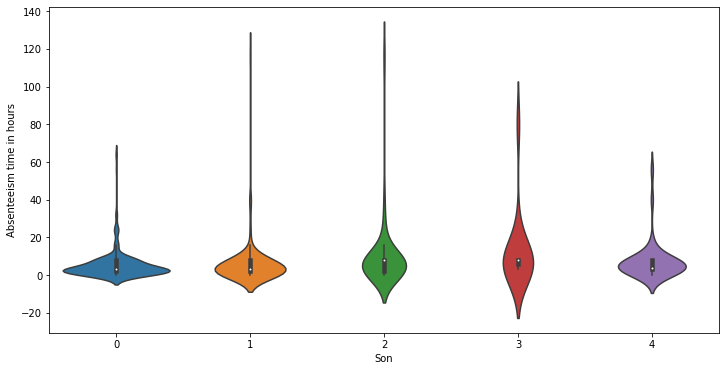

In [54]:
plt.figure(figsize=(12,6))
sns.violinplot(x="Son", y="Absenteeism time in hours", data=pp_data)